In [ ]:


import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/health-appointment-train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/health-appointment-train/train.csv


In [2]:
df=pd.read_csv("/kaggle/input/health-appointment-train/train.csv")

In [3]:
df.head()

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,221,9.991592e+11,5622419,F,2016-04-26,2016-04-29,53,BONFIM,False,True,False,False,False,True,True,3
1,83726,2.318917e+12,5536772,M,2016-04-01,2016-06-06,70,JARDIM CAMBURI,False,True,True,False,False,True,True,66
2,45547,3.589134e+13,5616093,F,2016-04-25,2016-05-16,59,SANTOS DUMONT,False,False,False,False,False,False,True,21
3,12687,6.339484e+10,5481521,F,2016-03-17,2016-05-06,42,ILHA DE SANTA MARIA,False,False,False,False,False,True,True,50
4,42647,7.489773e+12,5430688,M,2016-03-04,2016-05-05,57,ITARARÉ,False,False,False,False,True,True,True,62


## Dataset Features Explained

* **PatientId**: Unique identifier for each patient. Useful only for grouping or tracking, not for prediction.

* **AppointmentID**: Unique identifier for each appointment. Like PatientId, generally not used as a feature directly.

* **Gender**: Patient’s gender, can be relevant for analysis of attendance patterns.

* **ScheduledDay**: Date when the appointment was scheduled. Used to calculate waiting period.

* **AppointmentDay**: Date of the actual appointment. Necessary for time-based calculations.

* **Age**: Age of the patient, may influence the likelihood of attending.

* **Neighbourhood**: Patient’s locality. Can reveal geographical or socio-economic trends in attendance.

* **Scholarship**: Whether the patient received a government scholarship (True/False). Indicates socio-economic support.

* **Hipertension**: Presence of hypertension as a medical condition (True/False).

* **Diabetes**: Indicates if the patient has diabetes (True/False).

* **Alcoholism**: Indicates alcoholism status (True/False).

* **Handcap**: Presence of disabilities (True/False).



In [4]:
df.describe()

,Unnamed: 0,PatientId,AppointmentID,Age,Date.diff
count,85589.000000,8.558900e+04,8.558900e+04,85589.000000,85589.000000
mean,53597.638949,1.471754e+14,5.675535e+06,38.337146,10.171693
std,30925.511713,2.557578e+14,7.141171e+04,22.454448,15.255918
min,0.000000,3.921784e+04,5.122866e+06,1.000000,-6.000000
25%,26777.000000,4.166843e+12,5.640566e+06,19.000000,0.000000
50%,53605.000000,3.153551e+13,5.680892e+06,38.000000,4.000000
75%,80459.000000,9.423212e+13,5.725778e+06,56.000000,15.000000
max,106986.000000,9.999686e+14,5.790481e+06,115.000000,179.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85589 entries, 0 to 85588
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      85589 non-null  int64  
 1   PatientId       85589 non-null  float64
 2   AppointmentID   85589 non-null  int64  
 3   Gender          85589 non-null  object 
 4   ScheduledDay    85589 non-null  object 
 5   AppointmentDay  85589 non-null  object 
 6   Age             85589 non-null  int64  
 7   Neighbourhood   85589 non-null  object 
 8   Scholarship     85589 non-null  bool   
 9   Hipertension    85589 non-null  bool   
 10  Diabetes        85589 non-null  bool   
 11  Alcoholism      85589 non-null  bool   
 12  Handcap         85589 non-null  bool   
 13  SMS_received    85589 non-null  bool   
 14  Showed_up       85589 non-null  bool   
 15  Date.diff       85589 non-null  int64  
dtypes: bool(7), float64(1), int64(4), object(4)
memory usage: 6.4+ MB


In [6]:
df.isnull().sum()

Unnamed: 0        0
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

count    85589.000000
mean        38.337146
std         22.454448
min          1.000000
25%         19.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64


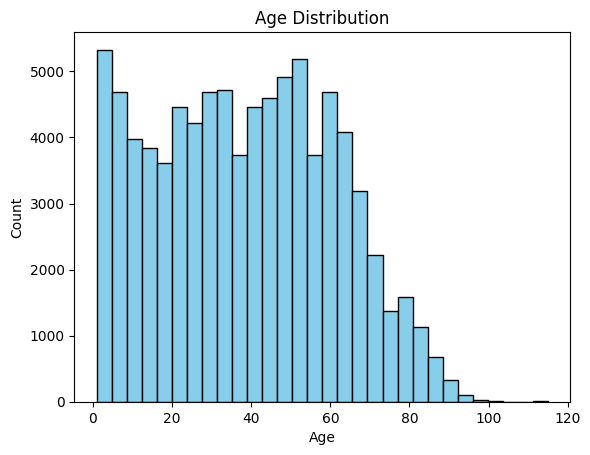

Empty DataFrame
Columns: [Unnamed: 0, PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, Showed_up, Date.diff]
Index: []
       Unnamed: 0     PatientId  AppointmentID Gender ScheduledDay  \
1483        61803  3.196321e+13        5700278      F   2016-05-16   
2115        87422  2.342836e+11        5751563      F   2016-05-31   
19595       73825  3.196321e+13        5744037      F   2016-05-30   
47061       61806  3.196321e+13        5700279      F   2016-05-16   
53128       94560  7.482346e+14        5717451      F   2016-05-19   
58207       65876  3.196321e+13        5562812      F   2016-04-08   
76863       56030  9.762948e+14        5651757      F   2016-05-03   

      AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  Diabetes  \
1483      2016-05-19  115    ANDORINHAS        False         False     False   
2115      2016-06-02  102   MARIA ORTIZ        False 

In [7]:
print(df['Age'].describe())

# Visualize Age distribution
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Find outliers or invalid ages (e.g. Age < 0 or Age > 100)
print(df[df['Age'] < 0])  # Check for negative ages
print(df[df['Age'] > 100])  # Check for ages above 100

In [ ]:
df['Age_capped'] = df['Age'].apply(lambda x: min(x, 100)) 

In [9]:
# Check correlation between Age and Showed_up
correlation = df['Age_capped'].corr(df['Showed_up'])
print(f"Correlation between Age and Showed_up: {correlation}")

Correlation between Age and Showed_up: 0.06736186587492814


In [10]:
# Define age bins and labels
bins = [0, 17, 39, 64, 115]
labels = ['Child', 'Young_Adult', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels) ##-----------------------------------------

# Check resulting age groups
print(df['AgeGroup'].value_counts())

AgeGroup
Adult          29548
Young_Adult    25488
Child          19025
Elderly        11528
Name: count, dtype: int64


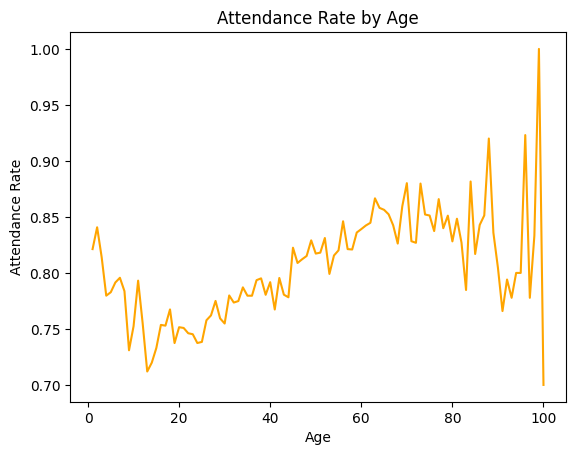

AgeGroup
Child          0.775821
Young_Adult    0.765537
Adult          0.819345
Elderly        0.845940
Name: Showed_up, dtype: float64


In [11]:
# Group by age and calculate mean attendance
attendance_by_age = df.groupby('Age_capped')['Showed_up'].mean()

plt.plot(attendance_by_age.index, attendance_by_age.values, color='orange')
plt.xlabel('Age')
plt.ylabel('Attendance Rate')
plt.title('Attendance Rate by Age')
plt.show()

# Attendance rate by age group
attendance_by_group = df.groupby('AgeGroup')['Showed_up'].mean()
print(attendance_by_group)


## Age Feature Analysis
The Age feature in our dataset ranges from 1 to 115 years, though ages above 100 have been capped at 100 to address potential outliers and data quality concerns. After capping, our data better represents realistic patient age distributions.

### Age Distribution Insights
* The age histogram shows a relatively uniform spread from children to middle-aged adults, with a gradual decline in older age groups.

* Few patients are above age 80, and the occurrence of ages close to 100 is extremely rare.

* The average (mean) age in the dataset is about 38, with most patients falling between 19 and 56 years old.

In [12]:
from scipy.stats import spearmanr

spearman_corr, spearman_p = spearmanr(df['Date.diff'], df['Showed_up'])
print(f'Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4f}')


Spearman correlation: -0.2857, p-value: 0.0000


In [13]:
import pandas as pd

# Calculate attendance rate per neighbourhood
attendance_by_neighbourhood = df.groupby('Neighbourhood')['Showed_up'].mean()
print(attendance_by_neighbourhood.sort_values())



Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    0.000000
SANTOS DUMONT                  0.711000
ILHA DO FRADE                  0.714286
SANTA CECÍLIA                  0.721127
ITARARÉ                        0.736726
                                 ...   
DE LOURDES                     0.849802
DO CABRAL                      0.857143
AEROPORTO                      0.857143
MÁRIO CYPRESTE                 0.858108
ILHA DO BOI                    0.888889
Name: Showed_up, Length: 80, dtype: float64


                                 mean  count
Neighbourhood                               
ILHAS OCEÂNICAS DE TRINDADE  0.000000      2
SANTOS DUMONT                0.711000   1000
ILHA DO FRADE                0.714286      7
SANTA CECÍLIA                0.721127    355
ITARARÉ                      0.736726   2712
...                               ...    ...
DE LOURDES                   0.849802    253
DO CABRAL                    0.857143    427
AEROPORTO                    0.857143      7
MÁRIO CYPRESTE               0.858108    296
ILHA DO BOI                  0.888889     27

[80 rows x 2 columns]


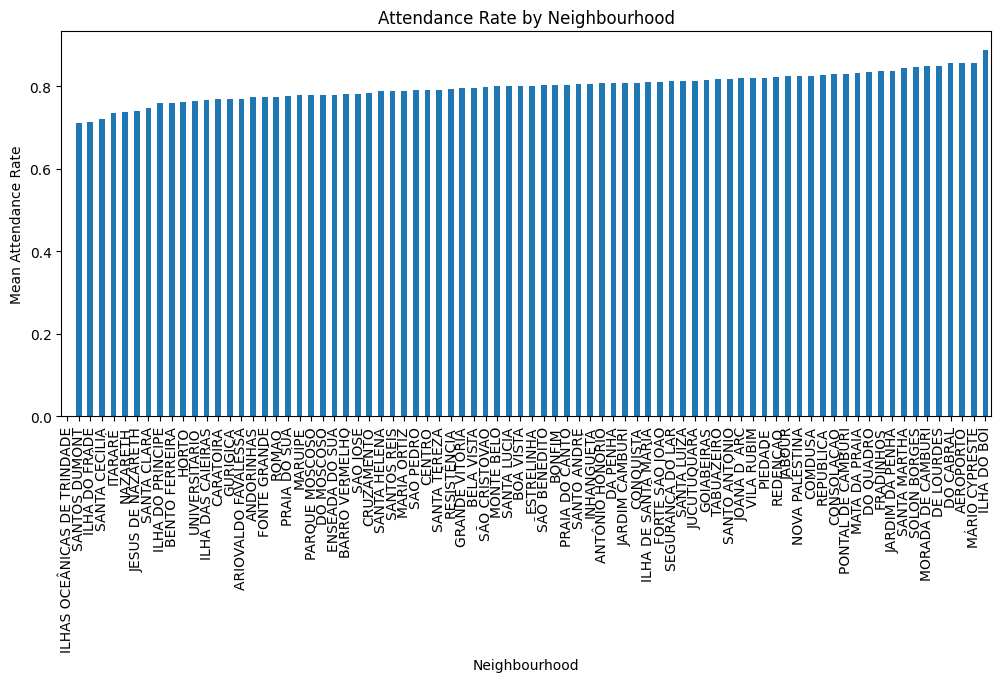

In [14]:
# Get summary statistics per neighbourhood
group_stats = df.groupby('Neighbourhood')['Showed_up'].agg(['mean', 'count'])
print(group_stats.sort_values('mean'))

# Bar chart of attendance rates
attendance_by_neighbourhood.sort_values().plot(kind='bar', figsize=(12,5))
plt.ylabel('Mean Attendance Rate')
plt.title('Attendance Rate by Neighbourhood')
plt.show()



                    mean  count
Neighbourhood                  
SANTOS DUMONT   0.711000   1000
ILHA DO FRADE   0.714286      7
SANTA CECÍLIA   0.721127    355
ITARARÉ         0.736726   2712
NAZARETH        0.737374     99
...                  ...    ...
DE LOURDES      0.849802    253
DO CABRAL       0.857143    427
AEROPORTO       0.857143      7
MÁRIO CYPRESTE  0.858108    296
ILHA DO BOI     0.888889     27

[79 rows x 2 columns]


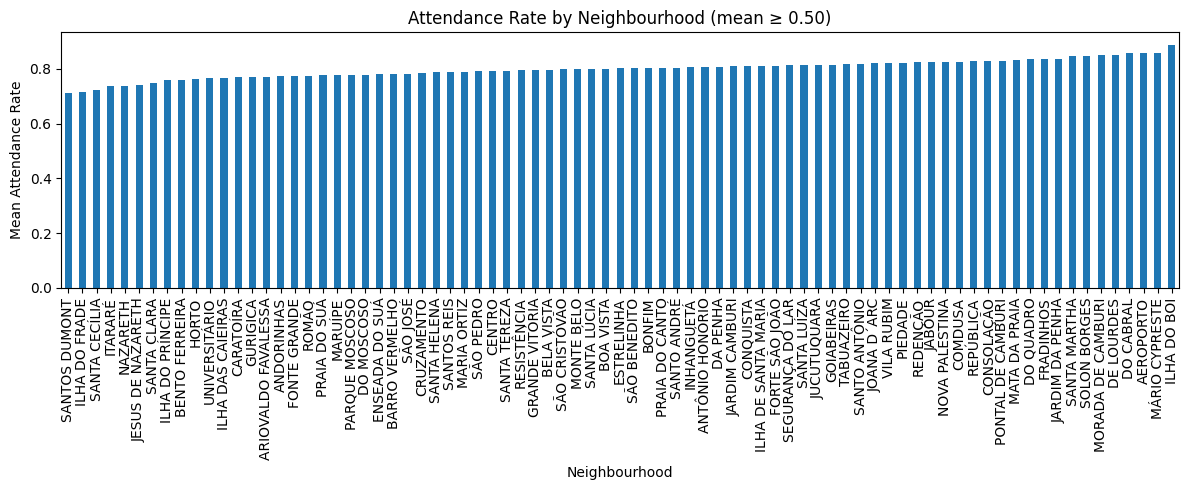

In [15]:
filtered_stats = group_stats[group_stats['mean'] >= 0.50]

# For plotting, use the mean from the filtered stats
attendance_by_neighbourhood = filtered_stats['mean']

print(filtered_stats.sort_values('mean'))

# Bar chart of attendance rates (filtered)
attendance_by_neighbourhood.sort_values().plot(kind='bar', figsize=(12,5))
plt.ylabel('Mean Attendance Rate')
plt.title('Attendance Rate by Neighbourhood (mean ≥ 0.50)')
plt.tight_layout()
plt.show()


* By grouping data by Neighbourhood and computing the mean of Showed_up, different geographic patterns in attendance become visible.
* Filtering out neighbourhoods below a chosen attendance threshold (for example, mean < 0.50) helps focus analysis on areas with more reliable or acceptable adherence levels.
* After analysis and possible filtering, Neighbourhood can be encoded as a categorical feature (e.g., one-hot encoding) and used in the machine learning model to capture geographic effects on show-up behavior.



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85589 entries, 0 to 85588
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      85589 non-null  int64   
 1   PatientId       85589 non-null  float64 
 2   AppointmentID   85589 non-null  int64   
 3   Gender          85589 non-null  object  
 4   ScheduledDay    85589 non-null  object  
 5   AppointmentDay  85589 non-null  object  
 6   Age             85589 non-null  int64   
 7   Neighbourhood   85589 non-null  object  
 8   Scholarship     85589 non-null  bool    
 9   Hipertension    85589 non-null  bool    
 10  Diabetes        85589 non-null  bool    
 11  Alcoholism      85589 non-null  bool    
 12  Handcap         85589 non-null  bool    
 13  SMS_received    85589 non-null  bool    
 14  Showed_up       85589 non-null  bool    
 15  Date.diff       85589 non-null  int64   
 16  Age_capped      85589 non-null  int64   
 17  AgeGroup    

In [17]:
Scholarship_stats = df.groupby('Scholarship')['Showed_up'].agg(['mean', 'count'])
print(Scholarship_stats.sort_values('mean'))



                 mean  count
Scholarship                 
True         0.762960   8661
False        0.801087  76928


### From the result:

* Scholarship = True

mean ≈ 0.763 → about 76.3% of patients with a scholarship showed up.

count = 8661 → there are 8,661 appointments with scholarship.

* Scholarship = False

mean ≈ 0.801 → about 80.1% of patients without a scholarship showed up.

count = 76,928 → there are 76,928 appointments without scholarship.

In [18]:
for col in ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']:
    print(f'\n=== {col} vs Showed_up (count & row %) ===')

    # counts
    ct = pd.crosstab(df[col], df['Showed_up'])

    # row %
    pct = ct.div(ct.sum(axis=1), axis=0) * 100

    # combine: "count (xx.xx%)"
    combined = ct.astype(str) + ' (' + pct.round(2).astype(str) + '%)'

    print(combined)





=== Hipertension vs Showed_up (count & row %) ===
Showed_up              False           True 
Hipertension                                
False         14359 (21.08%)  53752 (78.92%)
True           2996 (17.14%)  14482 (82.86%)

=== Diabetes vs Showed_up (count & row %) ===
Showed_up           False           True 
Diabetes                                 
False      16195 (20.43%)  63064 (79.57%)
True        1160 (18.33%)   5170 (81.67%)

=== Alcoholism vs Showed_up (count & row %) ===
Showed_up            False           True 
Alcoholism                                
False       16813 (20.29%)  66063 (79.71%)
True          542 (19.98%)   2171 (80.02%)

=== Handcap vs Showed_up (count & row %) ===
Showed_up           False           True 
Handcap                                  
False      17034 (20.33%)  66767 (79.67%)
True         321 (17.95%)   1467 (82.05%)


In [19]:
##----------------------------------------------------
df['Any_condition'] = (
    df['Hipertension'].astype(int)
  + df['Diabetes'].astype(int)
  + df['Alcoholism'].astype(int)
  + df['Handcap'].astype(int)
)

# Option A: binary “has at least one condition”
df['Has_condition'] = (df['Any_condition'] > 0).astype(int) ##--------------------------------------

In [20]:
# counts for the two groups
counts_no  = df[df['Has_condition'] == 0]['Showed_up'].value_counts()
counts_yes = df[df['Has_condition'] == 1]['Showed_up'].value_counts()

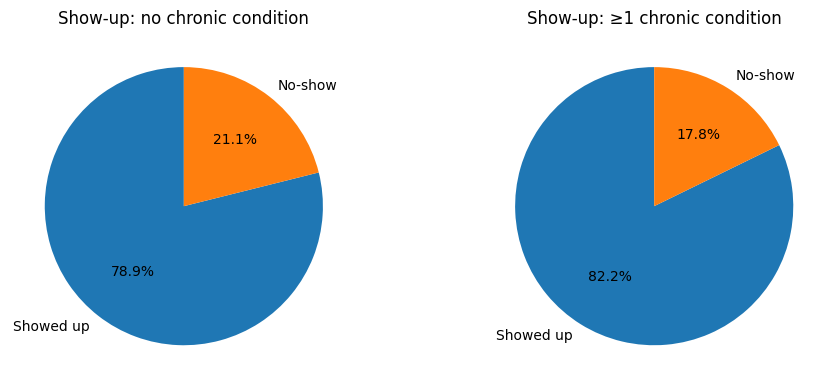

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# No chronic condition
axes[0].pie(
    counts_no.values,
    labels=['No-show', 'Showed up'] if counts_no.index.tolist()[0] == False else ['Showed up', 'No-show'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title('Show-up: no chronic condition')

# ≥1 chronic condition
axes[1].pie(
    counts_yes.values,
    labels=['No-show', 'Showed up'] if counts_yes.index.tolist()[0] == False else ['Showed up', 'No-show'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title('Show-up: ≥1 chronic condition')

plt.tight_layout()
plt.show()


### Chronic conditions and attendance
* Patients without any chronic condition show a no‑show rate of about 21.1%, meaning roughly four out of five such patients attend their appointments.

* Patients with at least one chronic condition (hypertension, diabetes, alcoholism, or handicap) have a lower no‑show rate of about 17.8%, so they attend slightly more reliably than healthier patients.

* The difference between the two groups suggests that chronic conditions are associated with better appointment adherence, possibly because these patients perceive their visits as more important for managing their health.

In [22]:
ct = pd.crosstab(df['SMS_received'], df['Showed_up'])
row_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(2)
combined = ct.astype(str) + ' (' + row_pct.astype(str) + '%)'
print(combined)

Showed_up             False           True 
SMS_received                               
False         9637 (16.66%)  48209 (83.34%)
True          7718 (27.82%)  20025 (72.18%)


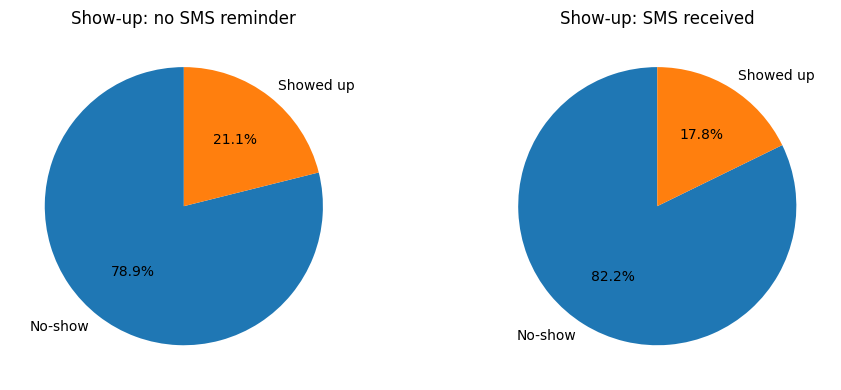

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# No SMS
axes[0].pie(
    counts_no.values,
    labels=['No-show', 'Showed up'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title('Show-up: no SMS reminder')

# SMS received
axes[1].pie(
    counts_yes.values,
    labels=['No-show', 'Showed up'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title('Show-up: SMS received')

plt.tight_layout()
plt.show()


### SMS reminders and attendance
* Among patients who did not receive an SMS reminder, about 21.1% missed their appointment, while roughly 78.9% attended.

* For patients who did receive an SMS reminder, the no‑show rate increases to around 82.2%, and the show‑up rate falls to about 17.8%, suggesting that SMS receipt alone does not guarantee better adherence and may be correlated with other risk factors for missing appointments (for example, clinics might send SMS more often to patients already considered at risk of no‑showing)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85589 entries, 0 to 85588
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      85589 non-null  int64   
 1   PatientId       85589 non-null  float64 
 2   AppointmentID   85589 non-null  int64   
 3   Gender          85589 non-null  object  
 4   ScheduledDay    85589 non-null  object  
 5   AppointmentDay  85589 non-null  object  
 6   Age             85589 non-null  int64   
 7   Neighbourhood   85589 non-null  object  
 8   Scholarship     85589 non-null  bool    
 9   Hipertension    85589 non-null  bool    
 10  Diabetes        85589 non-null  bool    
 11  Alcoholism      85589 non-null  bool    
 12  Handcap         85589 non-null  bool    
 13  SMS_received    85589 non-null  bool    
 14  Showed_up       85589 non-null  bool    
 15  Date.diff       85589 non-null  int64   
 16  Age_capped      85589 non-null  int64   
 17  AgeGroup    

In [25]:
df.head()

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,Age_capped,AgeGroup,Any_condition,Has_condition
0,221,9.991592e+11,5622419,F,2016-04-26,2016-04-29,53,BONFIM,False,True,False,False,False,True,True,3,53,Adult,1,1
1,83726,2.318917e+12,5536772,M,2016-04-01,2016-06-06,70,JARDIM CAMBURI,False,True,True,False,False,True,True,66,70,Elderly,2,1
2,45547,3.589134e+13,5616093,F,2016-04-25,2016-05-16,59,SANTOS DUMONT,False,False,False,False,False,False,True,21,59,Adult,0,0
3,12687,6.339484e+10,5481521,F,2016-03-17,2016-05-06,42,ILHA DE SANTA MARIA,False,False,False,False,False,True,True,50,42,Adult,0,0
4,42647,7.489773e+12,5430688,M,2016-03-04,2016-05-05,57,ITARARÉ,False,False,False,False,True,True,True,62,57,Adult,1,1


Gender
F    56069
M    29520
Name: count, dtype: int64
Gender
F    0.655
M    0.345
Name: proportion, dtype: float64


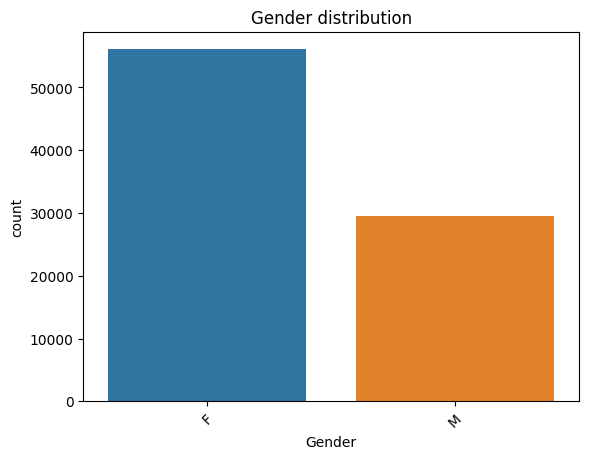

Scholarship
False    76928
True      8661
Name: count, dtype: int64
Scholarship
False    0.899
True     0.101
Name: proportion, dtype: float64


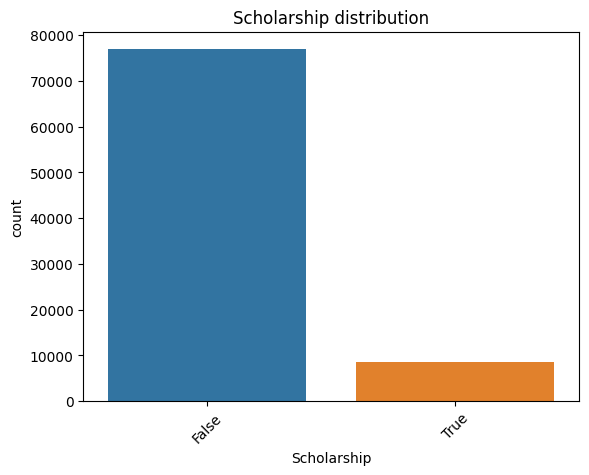

Hipertension
False    68111
True     17478
Name: count, dtype: int64
Hipertension
False    0.796
True     0.204
Name: proportion, dtype: float64


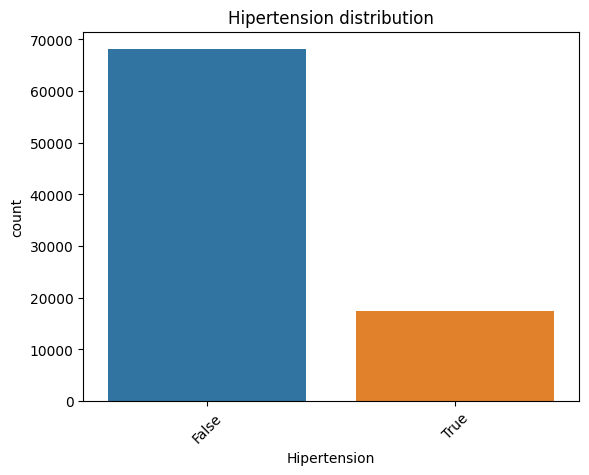

Diabetes
False    79259
True      6330
Name: count, dtype: int64
Diabetes
False    0.926
True     0.074
Name: proportion, dtype: float64


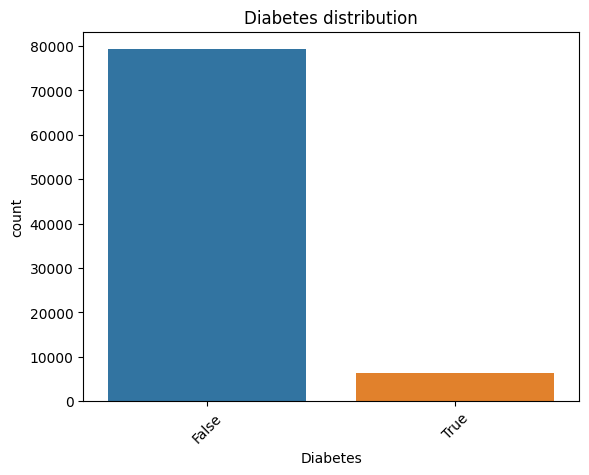

Alcoholism
False    82876
True      2713
Name: count, dtype: int64
Alcoholism
False    0.968
True     0.032
Name: proportion, dtype: float64


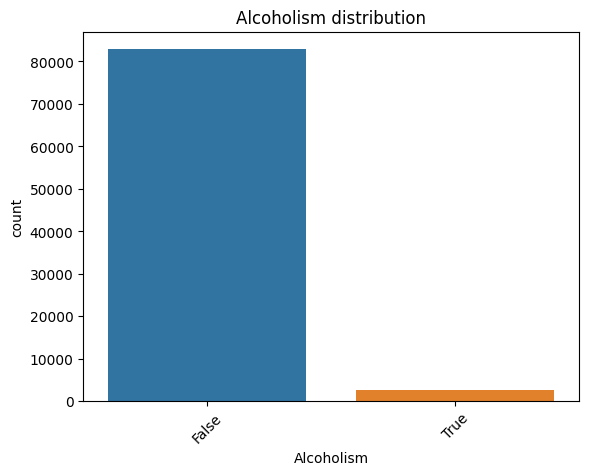

Handcap
False    83801
True      1788
Name: count, dtype: int64
Handcap
False    0.979
True     0.021
Name: proportion, dtype: float64


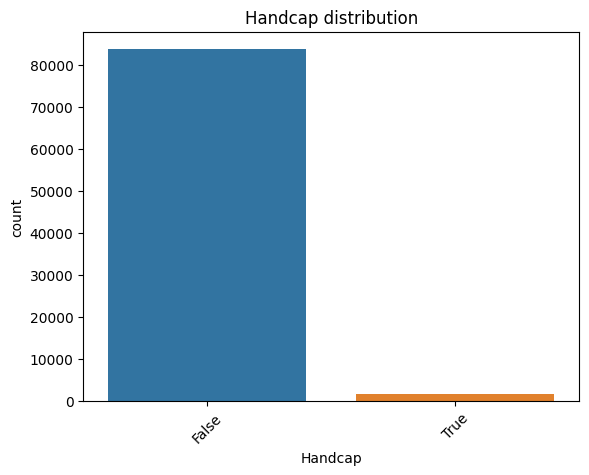

SMS_received
False    57846
True     27743
Name: count, dtype: int64
SMS_received
False    0.676
True     0.324
Name: proportion, dtype: float64


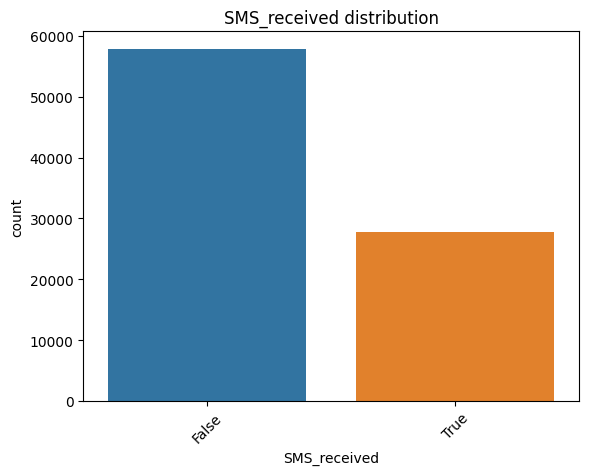

Neighbourhood
JARDIM CAMBURI                 6090
MARIA ORTIZ                    4395
RESISTÊNCIA                    3373
JARDIM DA PENHA                3097
ITARARÉ                        2712
                               ... 
PONTAL DE CAMBURI                53
ILHA DO BOI                      27
AEROPORTO                         7
ILHA DO FRADE                     7
ILHAS OCEÂNICAS DE TRINDADE       2
Name: count, Length: 80, dtype: int64
Neighbourhood
JARDIM CAMBURI                 0.071
MARIA ORTIZ                    0.051
RESISTÊNCIA                    0.039
JARDIM DA PENHA                0.036
ITARARÉ                        0.032
                               ...  
PONTAL DE CAMBURI              0.001
ILHA DO BOI                    0.000
AEROPORTO                      0.000
ILHA DO FRADE                  0.000
ILHAS OCEÂNICAS DE TRINDADE    0.000
Name: proportion, Length: 80, dtype: float64


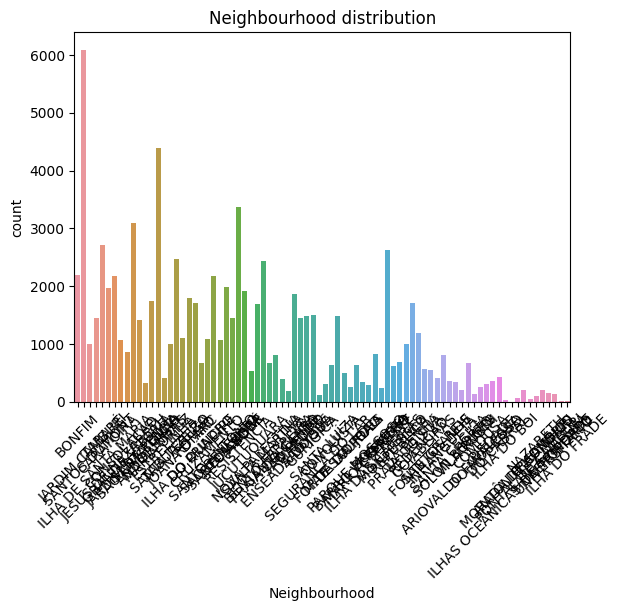

Showed_up
True     68234
False    17355
Name: count, dtype: int64
Showed_up
True     0.797
False    0.203
Name: proportion, dtype: float64


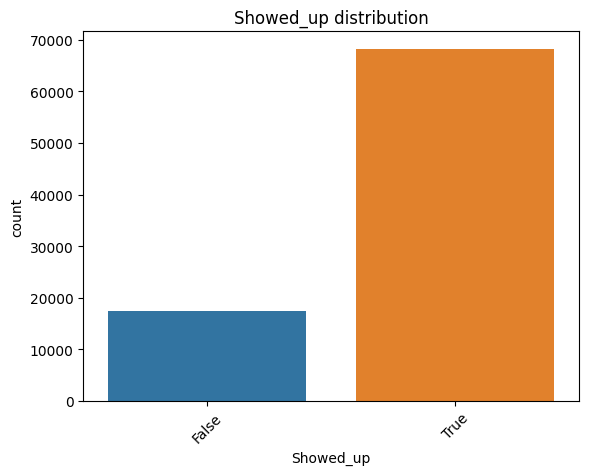

In [26]:
cat_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes',
            'Alcoholism', 'Handcap', 'SMS_received',
            'Neighbourhood','Showed_up']

for col in cat_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).round(3))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.xticks(rotation=45)
    plt.show()

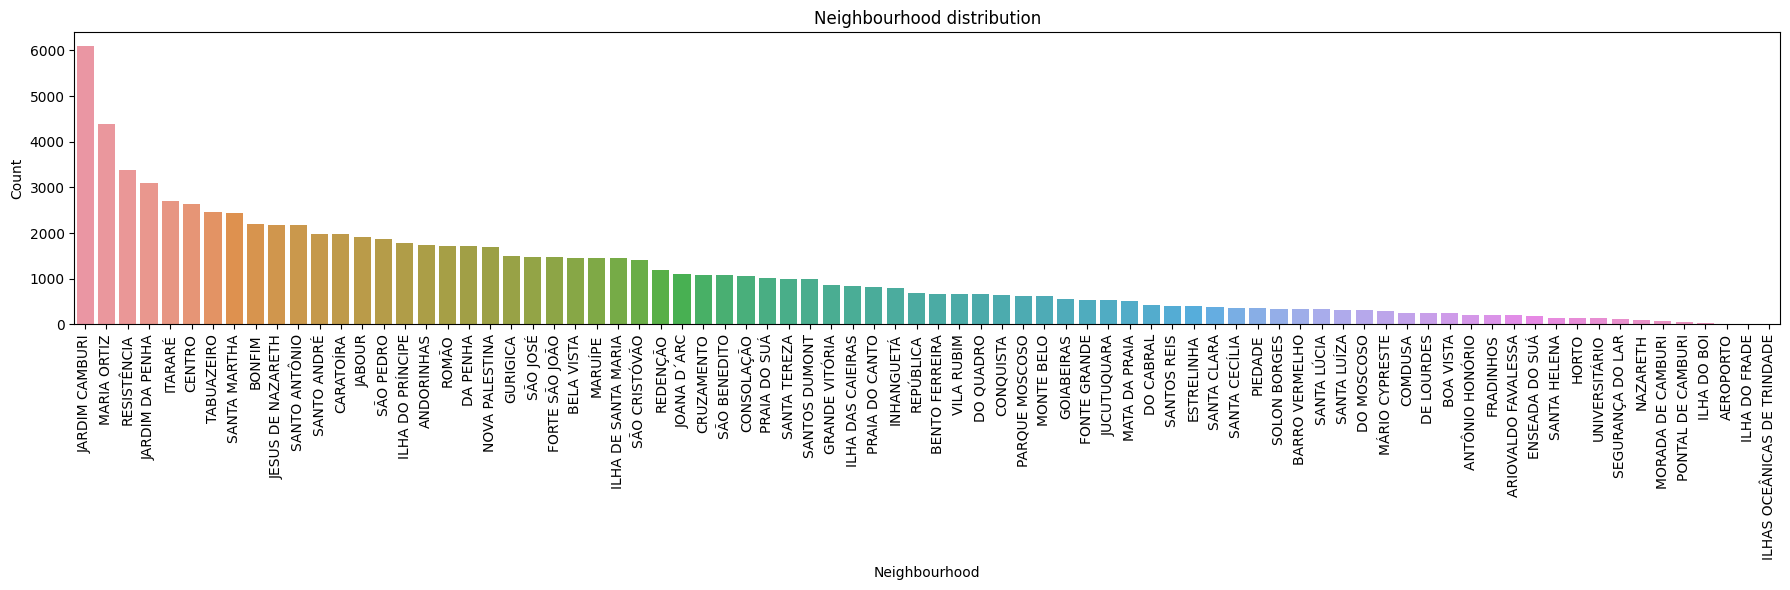

In [27]:
plt.figure(figsize=(18, 6))
sns.countplot(x='Neighbourhood', data=df, order=df['Neighbourhood'].value_counts().index)
plt.title('Neighbourhood distribution')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

* **Gender**: There are clearly more female patients than male patients in the dataset, so the data is gender‑imbalanced toward females.

* **Hypertension, Diabetes, Alcoholism, Handicap, Scholarship**: For each of these, the False bar is    much higher than the True bar, meaning most patients do not have these conditions or benefits,    and only a minority have them.

* **Neighbourhood**:The ordered bar plot reveals that a few neighbourhoods (for example, JARDIM CAMBURI and MARIO CYPRESTE) contribute a very large number of appointments, while many others have relatively small counts.

count    85589.000000
mean        38.336223
std         22.451618
min          1.000000
25%         19.000000
50%         38.000000
75%         56.000000
max        100.000000
Name: Age_capped, dtype: float64


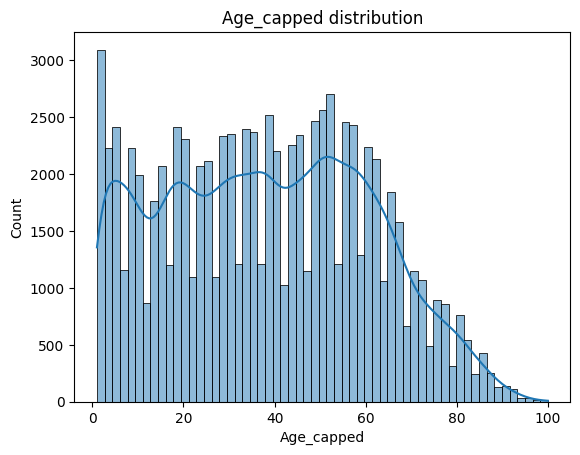

count    85589.000000
mean        10.171693
std         15.255918
min         -6.000000
25%          0.000000
50%          4.000000
75%         15.000000
max        179.000000
Name: Date.diff, dtype: float64


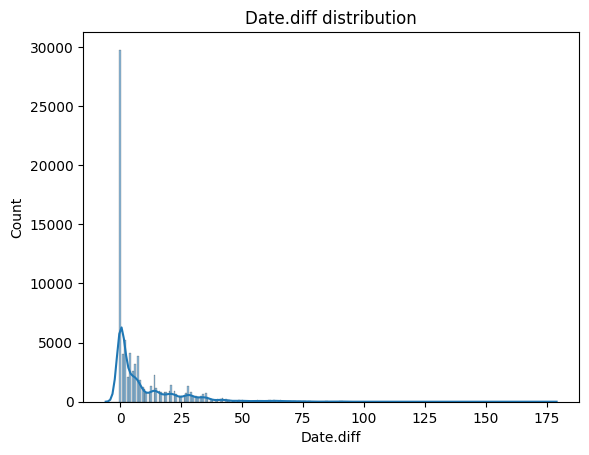

In [28]:
num_cols = ['Age_capped', 'Date.diff']

for col in num_cols:
    print(df[col].describe())
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} distribution')
    plt.show()

* Ages are spread across the whole life span, but the bulk of patients fall roughly between their 20s and 60s, with the density gradually decreasing after about 60 years.

* Waiting time is highly right‑skewed: most appointments have very short gaps (around 0–5 days), and only a small number extend to several weeks or months.

In [29]:
print(df['Showed_up'].value_counts())

Showed_up
True     68234
False    17355
Name: count, dtype: int64


## Feature Selection and Feature Engineering

In [30]:
top_n = 30
top_neigh = df['Neighbourhood'].value_counts().nlargest(top_n).index

# create a new column with rare categories grouped as "Other"
df['Neighbourhood_grouped'] = df['Neighbourhood'].where(
    df['Neighbourhood'].isin(top_neigh),
    other='Other'
)


In [31]:
df['Date_diff_log'] = np.log1p(df['Date.diff'])


In [32]:
cat_cols



['Gender',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'Neighbourhood',
 'Showed_up']

In [33]:
num_cols

['Age_capped', 'Date.diff']

In [34]:
cat_cols

['Gender',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'Neighbourhood',
 'Showed_up']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85589 entries, 0 to 85588
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0             85589 non-null  int64   
 1   PatientId              85589 non-null  float64 
 2   AppointmentID          85589 non-null  int64   
 3   Gender                 85589 non-null  object  
 4   ScheduledDay           85589 non-null  object  
 5   AppointmentDay         85589 non-null  object  
 6   Age                    85589 non-null  int64   
 7   Neighbourhood          85589 non-null  object  
 8   Scholarship            85589 non-null  bool    
 9   Hipertension           85589 non-null  bool    
 10  Diabetes               85589 non-null  bool    
 11  Alcoholism             85589 non-null  bool    
 12  Handcap                85589 non-null  bool    
 13  SMS_received           85589 non-null  bool    
 14  Showed_up              85589 non-null 

In [36]:
drop_cols = ['Unnamed: 0', 'PatientId', 'AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood','Age','AgeGroup','Any_condition','Date.diff']


df_model = df.drop(columns=drop_cols)

In [37]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85589 entries, 0 to 85588
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 85589 non-null  object 
 1   Scholarship            85589 non-null  bool   
 2   Hipertension           85589 non-null  bool   
 3   Diabetes               85589 non-null  bool   
 4   Alcoholism             85589 non-null  bool   
 5   Handcap                85589 non-null  bool   
 6   SMS_received           85589 non-null  bool   
 7   Showed_up              85589 non-null  bool   
 8   Age_capped             85589 non-null  int64  
 9   Has_condition          85589 non-null  int64  
 10  Neighbourhood_grouped  85589 non-null  object 
 11  Date_diff_log          85588 non-null  float64
dtypes: bool(7), float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [38]:
df_model_encoded = df_model.copy()

# map Gender: F=0, M=1  (or the opposite if you prefer)
df_model_encoded['Gender'] = df_model_encoded['Gender'].map({'F': 0, 'M': 1}).astype(int)

# convert all boolean columns to int
bool_cols = ['Scholarship', 'Hipertension', 'Diabetes',
             'Alcoholism', 'Handcap', 'SMS_received',
             'Has_condition', 'Showed_up']

df_model_encoded[bool_cols] = df_model_encoded[bool_cols].astype(int)


In [39]:
# one‑hot encode neighbourhood (drop_first avoids dummy trap for linear models)
df_model_encoded = pd.get_dummies(
    df_model_encoded,
    columns=['Neighbourhood_grouped'],
    drop_first=True
)

df_model_encoded.head()

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Age_capped,Has_condition,...,Neighbourhood_grouped_REDENÇÃO,Neighbourhood_grouped_RESISTÊNCIA,Neighbourhood_grouped_ROMÃO,Neighbourhood_grouped_SANTA MARTHA,Neighbourhood_grouped_SANTO ANDRÉ,Neighbourhood_grouped_SANTO ANTÔNIO,Neighbourhood_grouped_SÃO CRISTÓVÃO,Neighbourhood_grouped_SÃO JOSÉ,Neighbourhood_grouped_SÃO PEDRO,Neighbourhood_grouped_TABUAZEIRO
0,0,0,1,0,0,0,1,1,53,1,...,False,False,False,False,False,False,False,False,False,False
1,1,0,1,1,0,0,1,1,70,1,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,0,0,0,1,59,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,0,0,0,1,1,42,0,...,False,False,False,False,False,False,False,False,False,False
4,1,0,0,0,0,1,1,1,57,1,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df_model_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85589 entries, 0 to 85588
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     85589 non-null  int64  
 1   Scholarship                                85589 non-null  int64  
 2   Hipertension                               85589 non-null  int64  
 3   Diabetes                                   85589 non-null  int64  
 4   Alcoholism                                 85589 non-null  int64  
 5   Handcap                                    85589 non-null  int64  
 6   SMS_received                               85589 non-null  int64  
 7   Showed_up                                  85589 non-null  int64  
 8   Age_capped                                 85589 non-null  int64  
 9   Has_condition                              85589 non-null  int64  
 10  Date_diff_log         

In [41]:
df_model_encoded[df_model_encoded['Date_diff_log'].isnull()]

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Age_capped,Has_condition,...,Neighbourhood_grouped_REDENÇÃO,Neighbourhood_grouped_RESISTÊNCIA,Neighbourhood_grouped_ROMÃO,Neighbourhood_grouped_SANTA MARTHA,Neighbourhood_grouped_SANTO ANDRÉ,Neighbourhood_grouped_SANTO ANTÔNIO,Neighbourhood_grouped_SÃO CRISTÓVÃO,Neighbourhood_grouped_SÃO JOSÉ,Neighbourhood_grouped_SÃO PEDRO,Neighbourhood_grouped_TABUAZEIRO
63214,0,0,0,0,0,0,0,0,81,0,...,False,False,False,False,False,True,False,False,False,False


In [42]:
df_model_encoded = df_model_encoded.dropna(subset=['Date_diff_log']).reset_index(drop=True)

In [43]:
df_model_encoded.isnull().sum()

Gender                                       0
Scholarship                                  0
Hipertension                                 0
Diabetes                                     0
Alcoholism                                   0
Handcap                                      0
SMS_received                                 0
Showed_up                                    0
Age_capped                                   0
Has_condition                                0
Date_diff_log                                0
Neighbourhood_grouped_BELA VISTA             0
Neighbourhood_grouped_BONFIM                 0
Neighbourhood_grouped_CARATOÍRA              0
Neighbourhood_grouped_CENTRO                 0
Neighbourhood_grouped_CRUZAMENTO             0
Neighbourhood_grouped_DA PENHA               0
Neighbourhood_grouped_FORTE SÃO JOÃO         0
Neighbourhood_grouped_GURIGICA               0
Neighbourhood_grouped_ILHA DE SANTA MARIA    0
Neighbourhood_grouped_ILHA DO PRÍNCIPE       0
Neighbourhood

## Train-test Split

In [44]:
df_model_encoded['Showed_up'].value_counts()

Showed_up
1    68234
0    17354
Name: count, dtype: int64

It's am imbalanced dataset.So we will use SMOTE technique to overcome this problem.

In [45]:
X = df_model_encoded.drop(columns='Showed_up')
y = df_model_encoded['Showed_up']

In [46]:
X.columns

Index(['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handcap', 'SMS_received', 'Age_capped', 'Has_condition',
       'Date_diff_log', 'Neighbourhood_grouped_BELA VISTA',
       'Neighbourhood_grouped_BONFIM', 'Neighbourhood_grouped_CARATOÍRA',
       'Neighbourhood_grouped_CENTRO', 'Neighbourhood_grouped_CRUZAMENTO',
       'Neighbourhood_grouped_DA PENHA',
       'Neighbourhood_grouped_FORTE SÃO JOÃO',
       'Neighbourhood_grouped_GURIGICA',
       'Neighbourhood_grouped_ILHA DE SANTA MARIA',
       'Neighbourhood_grouped_ILHA DO PRÍNCIPE',
       'Neighbourhood_grouped_ITARARÉ', 'Neighbourhood_grouped_JABOUR',
       'Neighbourhood_grouped_JARDIM CAMBURI',
       'Neighbourhood_grouped_JARDIM DA PENHA',
       'Neighbourhood_grouped_JESUS DE NAZARETH',
       'Neighbourhood_grouped_JOANA D´ARC',
       'Neighbourhood_grouped_MARIA ORTIZ', 'Neighbourhood_grouped_MARUÍPE',
       'Neighbourhood_grouped_NOVA PALESTINA', 'Neighbourhood_grouped_Other',
      

In [47]:
X.isnull().sum()

Gender                                       0
Scholarship                                  0
Hipertension                                 0
Diabetes                                     0
Alcoholism                                   0
Handcap                                      0
SMS_received                                 0
Age_capped                                   0
Has_condition                                0
Date_diff_log                                0
Neighbourhood_grouped_BELA VISTA             0
Neighbourhood_grouped_BONFIM                 0
Neighbourhood_grouped_CARATOÍRA              0
Neighbourhood_grouped_CENTRO                 0
Neighbourhood_grouped_CRUZAMENTO             0
Neighbourhood_grouped_DA PENHA               0
Neighbourhood_grouped_FORTE SÃO JOÃO         0
Neighbourhood_grouped_GURIGICA               0
Neighbourhood_grouped_ILHA DE SANTA MARIA    0
Neighbourhood_grouped_ILHA DO PRÍNCIPE       0
Neighbourhood_grouped_ITARARÉ                0
Neighbourhood

In [48]:
# keep only numeric columns
X_num = X.select_dtypes(include=[np.number])

# 1) any inf?
np.isinf(X_num.values).any()

# 2) which columns have inf?
cols_with_inf = X_num.columns[np.isinf(X_num).any(axis=0)]
print(cols_with_inf)

# 3) show problematic rows
rows_with_inf = np.isinf(X_num[cols_with_inf]).any(axis=1)
X.loc[rows_with_inf, cols_with_inf]

Index(['Date_diff_log'], dtype='object')


,Date_diff_log
10447,-inf
46620,-inf
53409,-inf
54354,-inf


Ohkk.In our matrix, there are some +∞ or −∞ values after the transformations

In [49]:
X[cols_with_inf] = X[cols_with_inf].replace([np.inf, -np.inf], np.nan)
X = X.dropna().reset_index(drop=True)

# keep y aligned if you have it
y = y.loc[X.index].reset_index(drop=True)

In [50]:
y.value_counts()

Showed_up
1    68230
0    17354
Name: count, dtype: int64

In [51]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 122.4 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [52]:
!pip install scipy

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [55]:
y_res.value_counts()

Showed_up
1    68230
0    68230
Name: count, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train , X_test , y_train , y_test = train_test_split(X_res,y_res , test_size=0.2 , random_state=42)

In [58]:
!pip install xgboost lightgbm

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [60]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [61]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [62]:
"""
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1) """

'\nfor model_name,classifier in classifiers.items():\n    classifier.fit(X_train,y_train)\n\n    y_pred = classifier.predict(X_test)\n\n    accuracy = accuracy_score(y_test,y_pred)\n    precision = precision_score(y_test,y_pred)\n    recall = recall_score(y_test,y_pred)\n    f1 = f1_score(y_test,y_pred)\n\n    metrics["Model"].append(model_name)\n    metrics["Accuracy"].append(accuracy)\n    metrics["Precision"].append(precision)\n    metrics["Recall"].append(recall)\n    metrics["F1 Score"].append(f1) '

In [63]:
## metrics_df= pd.DataFrame(metrics)

In [64]:
## metrics_df

In [65]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

In [66]:
param_dist = {
    'num_leaves': randint(20, 80),
    'max_depth': randint(3, 12),          # -1 = no limit
    'learning_rate': uniform(0.01, 0.2),  # 0.01–0.21
    'min_child_samples': randint(10, 80),
    'subsample': uniform(0.6, 0.4),       # 0.6–1.0
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0.0, 0.5),
    'reg_lambda': uniform(0.0, 0.5),
}

In [67]:
lgbm = LGBMClassifier(
    objective='binary',  
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

In [68]:
rs = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=15,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rs.fit(X_train, y_train)
best_lgbm = rs.best_estimator_


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 36303, number of negative: 36475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.554071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 72778, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498818 -> initscore=-0.004727
[LightGBM] [Info] Start training from score -0.004727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [69]:
rs.best_params_

{'colsample_bytree': 0.9464704583099741,
 'learning_rate': 0.13022300234864176,
 'max_depth': 10,
 'min_child_samples': 12,
 'num_leaves': 41,
 'reg_alpha': 0.028205789513550128,
 'reg_lambda': 0.36099938613341237,
 'subsample': 0.9754210836063001}

In [70]:
y_pred = best_lgbm.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [72]:
accuracy

0.7547633006009087

In [73]:
precision

0.6859768907563025

In [74]:
recall

0.9481669691470055


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [75]:
f1

0.7960383970745086


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[[ 7538  5979]
 [  714 13061]]


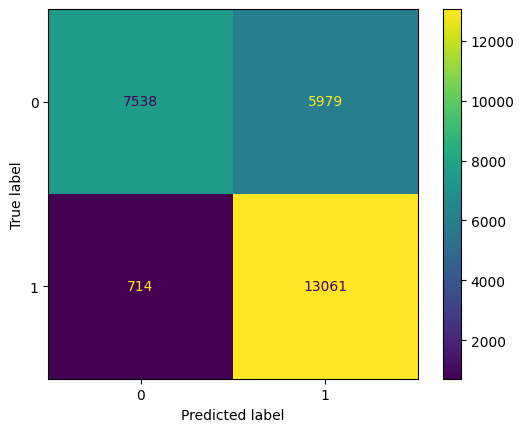

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)   
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(values_format='d')

In [ ]:
best_params = {
    'colsample_bytree': 0.9464704583099741,
    'learning_rate': 0.13022300234864176,
    'max_depth': 10,
    'min_child_samples': 12,
    'num_leaves': 41,
    'reg_alpha': 0.0282057895135550128,
    'reg_lambda': 0.360999383613341237,
    'subsample': 0.97542108366036001
}

lgbm_best = LGBMClassifier(
    objective='binary',
    n_estimators=300,          
    random_state=42,
    n_jobs=-1,
    **best_params
)

lgbm_best.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 54455, number of negative: 54713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 109168, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498818 -> initscore=-0.004727
[LightGBM] [Info] Start training from score -0.004727


LGBMClassifier(colsample_bytree=0.9464704583099741,
               learning_rate=0.13022300234864176, max_depth=10,
               min_child_samples=12, n_estimators=300, n_jobs=-1, num_leaves=41,
               objective='binary', random_state=42,
               reg_alpha=0.028205789513555013, reg_lambda=0.3609993836133412,
               subsample=0.97542108366036)

In [79]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# probabilities for class 1 (no‑show)
y_proba = lgbm_best.predict_proba(X_test)[:, 1]

def eval_threshold(threshold):
    y_pred_thr = (y_proba >= threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred_thr)
    precision = precision_score(y_test, y_pred_thr)
    recall = recall_score(y_test, y_pred_thr)
    f1 = f1_score(y_test, y_pred_thr)

    print(f"\nThreshold = {threshold}")
    print("Confusion matrix:\n", cm)
    print(f"Precision: {precision:.3f}  Recall: {recall:.3f}  F1: {f1:.3f}")

for thr in [0.5, 0.6, 0.7]:
    eval_threshold(thr)



Threshold = 0.5
Confusion matrix:
 [[ 7538  5979]
 [  714 13061]]
Precision: 0.686  Recall: 0.948  F1: 0.796

Threshold = 0.6
Confusion matrix:
 [[10435  3082]
 [ 4324  9451]]
Precision: 0.754  Recall: 0.686  F1: 0.718

Threshold = 0.7
Confusion matrix:
 [[12524   993]
 [ 9702  4073]]
Precision: 0.804  Recall: 0.296  F1: 0.432


In [80]:
import joblib

# save
joblib.dump(lgbm_best, "lgbm_no_show_model.joblib")

['lgbm_no_show_model.joblib']